# Example DRS Imager Processing

## Installation

In [ ]:
%pip install --upgrade pip setuptools wheel
!git clone https://github.com/oirlab/liger_iris_pipeline.git
%pip install ./liger_iris_pipeline

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.3 MB/s eta 0:00:00a 0:00:01
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Uninstalling wheel-0.37.1:
      Successfully uninstalled wheel-0.37.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.6.0
    Uninstalling setuptools-59.6.0:
      Successfully uninstalled setuptools-59.6.0
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0
Note: you may need to restart the kernel to use updated packages.
Cloning into 'liger_iris_pipeline'...
remote: Enumerating objects: 4495, done.
remote: Counting objects: 100% (910/910), done.
remote: Compressing obje

## Imports

In [ ]:
import liger_iris_pipeline
from liger_iris_pipeline.utils.gdrive import download_gdrive_file
import numpy as np
from astropy import units
import matplotlib.pyplot as plt

2025-07-15 08:15:12,062 - stpipe - WARNING - /Users/cale/anaconda3/envs/liger_iris/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



## Level 0 &rarr; Level 1 (Ramp level corrections and fitting)

In [ ]:
# Imager data of M13 stars
sci_L0_filepath = download_gdrive_file('Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas-skyscale1.0.fits', use_cached=True)
pipeline = liger_iris_pipeline.Stage1Pipeline()
pipeline.ramp_fit.method = 'ols'
nonlin_path = download_gdrive_file('Liger/Cals/Liger_IMG_NONLIN_20240924000000_0.0.1.fits', use_cached=True)
pipeline.nonlin_corr.nonlin = nonlin_path
model_result = pipeline.run([sci_L0_filepath])[0]

2025-07-15 08:17:36,981 - stpipe.Stage1Pipeline - INFO - Stage1Pipeline instance created.
2025-07-15 08:17:36,984 - stpipe.NonlinearCorrectionStep - INFO - NonlinearCorrectionStep instance created.
2025-07-15 08:17:36,985 - stpipe.FitRampStep - INFO - FitRampStep instance created.
2025-07-15 08:17:37,058 - stpipe.Stage1Pipeline - INFO - Running step <liger_iris_pipeline.pipeline.stage1.Stage1Pipeline object at 0x171889910> with parameters:
output_file=None
output_dir=None
save_results=False
skip=False
suffix=None
2025-07-15 08:17:37,108 - stpipe.NonlinearCorrectionStep - INFO - Running step <liger_iris_pipeline.readout.nonlincorr_step.NonlinearCorrectionStep object at 0x1718c9040> with parameters:
output_file=None
output_dir=None
save_results=False
skip=False
suffix=None
nonlin='/Users/cale/.astropy/cache/download/url/Liger/Cals/Liger_IMG_NONLIN_20240924000000_0.0.1.fits'
2025-07-15 08:17:37,212 - stpipe.NonlinearCorrectionStep - INFO - Using nonlin reference file /Users/cale/.astropy/

### Examine result

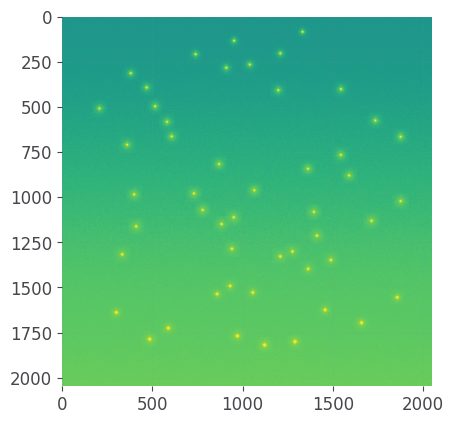

In [5]:
plt.imshow(model_result.data, vmin=0, vmax=np.quantile(model_result.data, .999))

## Level 1 &rarr; Level 2 (Standard calibrations, WCS assignment)

In [7]:
sci_L1_filepath = download_gdrive_file('Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas-skyscale1.0.fits', use_cached=True)
dark_filepath = download_gdrive_file('Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits', use_cached=True)
flat_filepath = download_gdrive_file('Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits', use_cached=True)
pipeline = liger_iris_pipeline.ImagerStage2Pipeline()
pipeline.dark_sub.dark = dark_filepath
pipeline.flat_field.flat = flat_filepath
input_dict = {
    'SCI' : [sci_L1_filepath],
}
model_result = pipeline.run(input_dict)[0]

2025-07-15 08:20:46,833 - stpipe.ImagerStage2Pipeline - INFO - ImagerStage2Pipeline instance created.
2025-07-15 08:20:46,840 - stpipe.ParseSubarrayMapStep - INFO - ParseSubarrayMapStep instance created.
2025-07-15 08:20:46,841 - stpipe.DarkSubtractionStep - INFO - DarkSubtractionStep instance created.
2025-07-15 08:20:46,843 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-07-15 08:20:46,846 - stpipe.CalculateBackgroundImagerStep - INFO - CalculateBackgroundImagerStep instance created.
2025-07-15 08:20:46,850 - stpipe.SubtractBackgroundImagerStep - INFO - SubtractBackgroundImagerStep instance created.
2025-07-15 08:20:46,853 - stpipe.AssignWCSStep - INFO - AssignWCSStep instance created.
2025-07-15 08:20:46,929 - stpipe.ImagerStage2Pipeline - INFO - Running step <liger_iris_pipeline.pipeline.imager_stage2.ImagerStage2Pipeline object at 0x379cec4a0> with parameters:
output_file=None
output_dir=None
save_results=False
skip=False
suffix=None
2025-07-15 08:20:46,930 - 

### Examine Results

Image shape: 2048 x 2048
World corners (RA, Dec):
  250.418990, 36.457018
  250.426060, 36.457018
  250.426060, 36.462704
  250.418990, 36.462704


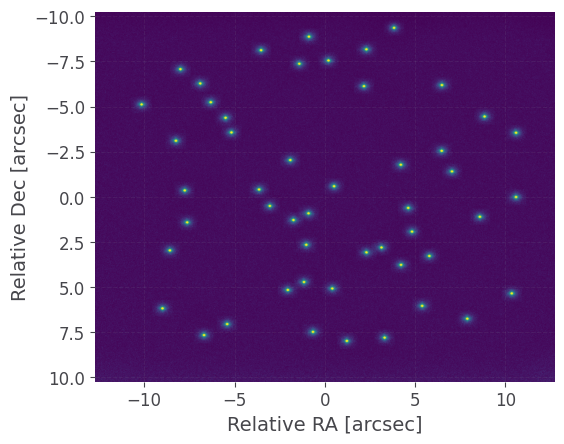

In [8]:
# Compute wcs corners
height, width = model_result.data.shape
print(f"Image shape: {height} x {width}")
corners = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]]) * units.pixel
world_corners = [model_result.meta.wcs(*corner) for corner in corners]
print("World corners (RA, Dec):")
for corner in world_corners:
    print(f"  {corner[0].value:.6f}, {corner[1].value:.6f}")
extent = [world_corners[0][0].value, world_corners[1][0].value, world_corners[2][1].value, world_corners[0][1].value]
dx = extent[1] - extent[0]
dy = extent[2] - extent[3]
extent = np.array([-dx / 2, dx / 2, dy / 2, -dy / 2]) * 3600

plt.imshow(model_result.data, extent=extent, vmin=0, vmax=np.quantile(model_result.data, .999))
#plt.xlim(-0.15, 0.15); plt.ylim(0.15, -0.15)
plt.xlabel("Relative RA [arcsec]"); plt.ylabel("Relative Dec [arcsec]")
plt.show()